# Deep Learning - Tensor Manipulation

### Author : Sangkeun Jung (hugmanskj@gmail.com)

In this tutorial, students can learn various tensor operations and handling techniques. I selected most frequentaly used and most fundamental tensor operations. This is the core part of deep learning, so please take a time to understand and practice the codes. 

The codes are based on PyTorch, and some operations, grammars are very specific to PyTorch. However, the concepts and the way of handling tensors are common in other machine learning frameworks such as tensorflow or mxnet. 

### Table of Contents

We can roughly categorize the data handling with following types :

- Tensor
    - Tensor Creation
        - Python object to Tensor Object
        - Numpy object to Tensor object
        - Tensor Types
    - Tensor Shape
        - check shape
        - reshape
        - view
    - Tensor Device Change
        - cpu or CUDA
    - Tensor Data Fetch
        - Tensor data to Python object
        - Tensor data to Numpy object
        - Tensor scalar to Python object (item)
- 1 to N Operations ( a Tensor → a list of Tensors )
- N to 1 Operations ( a list of Tensors → a Tensor )
- Dimension Operations
    - squeeze
    - unsqueeze
    - permutation
    - transpose
    - ...
- Indexing
- Reduce Operations
    - min, max, mean
    - argmax, argmin



## Tensor Creation

#### Python Object to Tensor

In python, we have several types of python-objecs to express **number**.
- scalar (integer, float)
- array ( list ) 

We can simply create tensor with following operations.


In [1]:
import torch 
# float variable to tensor object
x = 34.0 # float value
print( type(x) )
y = torch.tensor(x)
print( type(y) ) 
y

<class 'float'>
<class 'torch.Tensor'>


tensor(34.)

In [2]:
# directly create tensor 
y = torch.tensor(34.0)
print( type(y) ) 
y

<class 'torch.Tensor'>


tensor(34.)

In [4]:
# list --> tensor
x = [1,2,3,4]
y = torch.tensor(x)
print( type(x) ) 
print( type(y) ) 
y

<class 'list'>
<class 'torch.Tensor'>


tensor([1, 2, 3, 4])

In [5]:
# list of list --> tensor
x = [ 
      [1,2,3,4], 
      [5,6,7,8]
    ]  # 2 dimensional array
print( torch.tensor(x) )
print( torch.tensor(x).shape )
print( torch.tensor(x).size() )


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
torch.Size([2, 4])
torch.Size([2, 4])


#### Numpy  Object to Tensor

If you are familar with numpy, PyTorch tensor is very easy to understand since most of the pytorch API are just GPU-computable clones of numpy. 

In [6]:
import numpy as np
a = 34.3
b = torch.tensor(a)
print(b)
print(b.dtype)

x = np.array( 34.3 ) 
print(type(x))
print(x.dtype)
y = torch.tensor(x)
y

tensor(34.3000)
torch.float32
<class 'numpy.ndarray'>
float64


tensor(34.3000, dtype=torch.float64)

**Check :**  the dtype(data type) is explicitly set at numpy-to-tensor conversion

In [7]:
x = np.array( [ 
                [1,2,3,4], 
                [5,6,7,8]
               ]
            ) # 2 dimensional array
print( x.shape )

print( torch.tensor(x) )
print( torch.tensor(x).shape )

(2, 4)
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]], dtype=torch.int32)
torch.Size([2, 4])


Even, much larger tensor dimension can be handled. 

In [8]:
x = np.array([ [
                [ 
                   [1,2,3,4], 
                   [5,6,7,8] 
                ]
               ] 
              ]
            ) 
print( torch.tensor(x) )
print( torch.tensor(x).shape )

tensor([[[[1, 2, 3, 4],
          [5, 6, 7, 8]]]], dtype=torch.int32)
torch.Size([1, 1, 2, 4])


#### Tensor Types 

Pytorch tensor supports many numeric types. The summary is shown in below. 

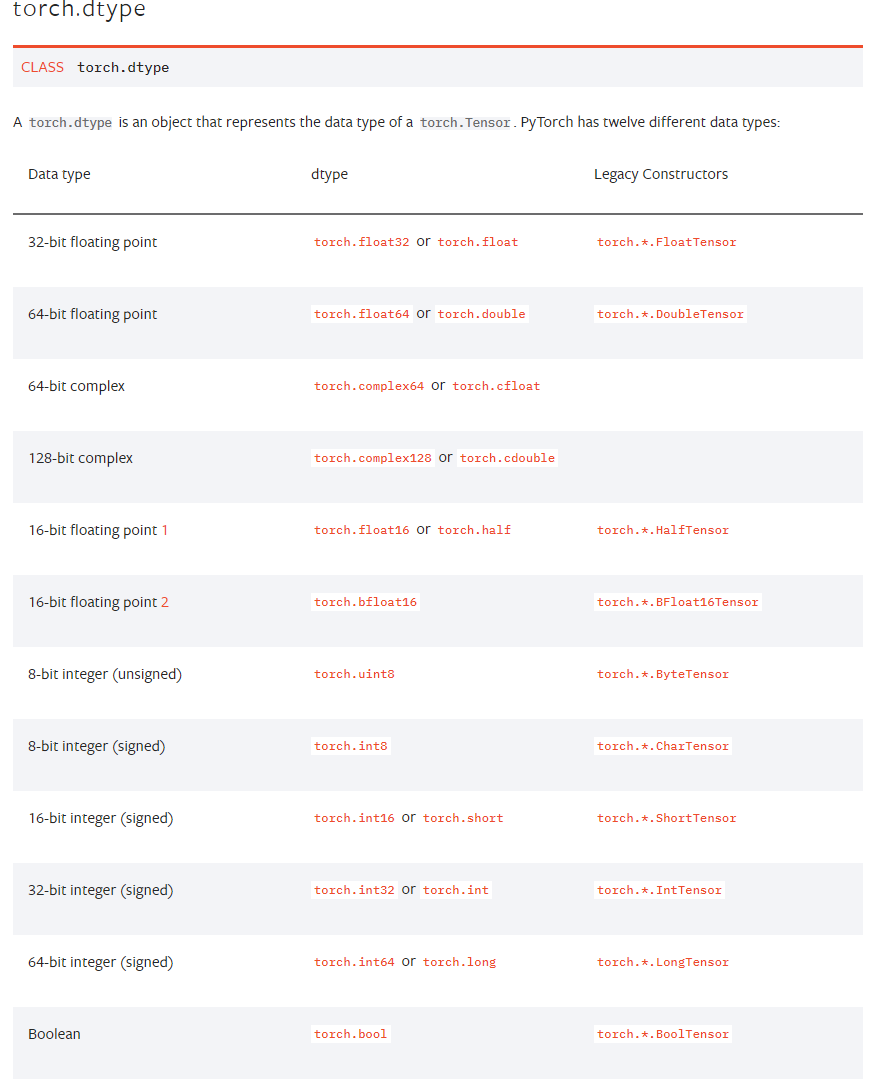

Most of case, **float** dtype is the typical choice for setting data type.

#### Tensor dtype Conversion 

Type conversion or setting is conducted with several ways. 
- by Creation 
- by Conversion
    - .to()
    - .type()
       


In [9]:
# by creation
x = torch.tensor( [1, 2, 3, 4], dtype=torch.float)
print( x )
print( x.dtype )

tensor([1., 2., 3., 4.])
torch.float32


In [10]:
# by creation
x = torch.tensor( [1, 2, 3, 4], dtype=torch.float16)
print( x )
print( x.dtype )

tensor([1., 2., 3., 4.], dtype=torch.float16)
torch.float16


In [11]:
# by explicit conversion by .to()
x = torch.tensor( [1, 2, 3, 4], dtype=torch.float)
print( x )
print( x.dtype )
y = x.to(torch.int)  # .to() is quite useful function in many cases. it is not for only type conversion but also device change. 
print( y )
print( y.dtype )

tensor([1., 2., 3., 4.])
torch.float32
tensor([1, 2, 3, 4], dtype=torch.int32)
torch.int32


In [12]:
# by explicit conversion by type()
x = torch.tensor( [1, 2, 3, 4], dtype=torch.float)
print( x )
print( x.dtype )
y = x.type(torch.int) 
print( y )
print( y.dtype )

tensor([1., 2., 3., 4.])
torch.float32
tensor([1, 2, 3, 4], dtype=torch.int32)
torch.int32


In [21]:
# you can even specify the type with "string" not object
x = torch.tensor( [1, 2, 3, 4], dtype=torch.float)
print( x )
print( x.dtype )
OUR_TYPE = "torch.ShortTensor"
y = x.type(OUR_TYPE)  # <-- string !!
print( y )
print( y.dtype )

tensor([1., 2., 3., 4.])
torch.float32
tensor([1, 2, 3, 4], dtype=torch.int16)
torch.int16


**Check :** the string type-name is from "LEGACY CONSTRUCTUR" of pytorch tensor (see above figure ) 

## Tensor Shape

Tensor is a n-dimensional array. Therefore, check and set the shape of tensor are fundamental and cruical operations for handling tensor. Shape operation might be your best and useful tool for deep learning. 

In here, we will check elemenary shape operations. Some of the advanced topics will be convered in the later of this lecture. 
We will see 
- Check shape
- Reshape

In [17]:
# check shape
x = torch.tensor( [ 
                    [1,2,3],
                    [4,5,6]
                  ] )
print(x)
print(x.shape) 

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [20]:
# you can also get the values of each dimension
batch_size, dim_1 = x.shape
print( "batch size :", batch_size )
print( "1st dimension : ", dim_1 )
print( x.size() )

batch size : 2
1st dimension :  3
torch.Size([2, 3])


In [25]:
# by "RESHAPE", you can change tensor shape whatever you want. 
print("Original : " , x.shape )
print("Reshaped : " , x.reshape([3,2]).shape ) # <-- check the result
print("Reshaped : " , x.reshape([1,6]).shape ) # <-- check the result
print("Reshaped : " , x.reshape([6,1]).shape ) # <-- check the result

print(x)
print("-----")
print(x.reshape([6]))
print(x.reshape([1,1,1,1,1,1,1,1,1,6]))

Original :  torch.Size([2, 3])
Reshaped :  torch.Size([3, 2])
Reshaped :  torch.Size([1, 6])
Reshaped :  torch.Size([6, 1])
tensor([[1, 2, 3],
        [4, 5, 6]])
-----
tensor([1, 2, 3, 4, 5, 6])
tensor([[[[[[[[[[1, 2, 3, 4, 5, 6]]]]]]]]]])


In [28]:
# but reshape is only allowed when the total size is same. 
print("Original : " , x.shape )
print("Reshaped : " , x.reshape([6,1]).shape ) # <-- it will cause 'ERROR' 

Original :  torch.Size([2, 3])
Reshaped :  torch.Size([6, 1])


#### (ADVANCED) reshape and view 

Pytorch support 'view' function for shaping operation. The functionality is almost same as reshape, but the memory usuage is different. 

Following description is from pytorch document.
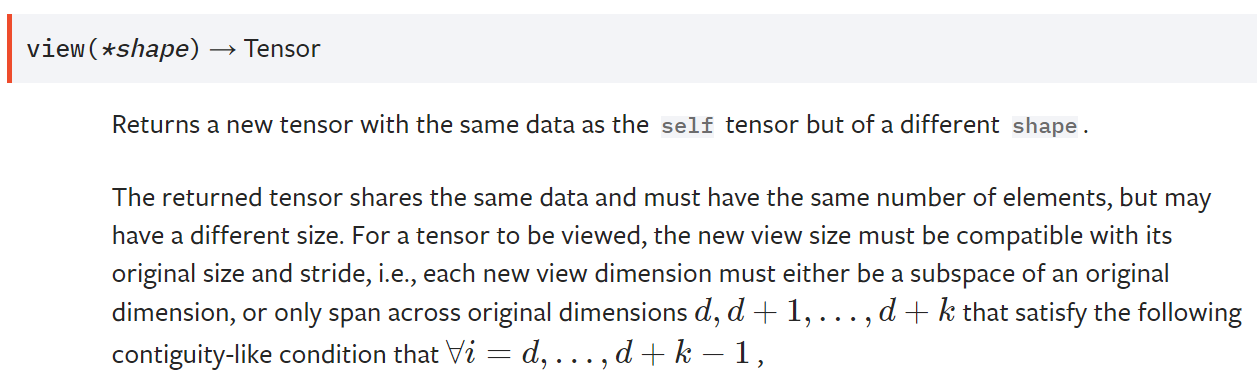


In [27]:
x = torch.randn(4, 4)
print( "x :", x.size() )
y = x.view(16)
print( "y :", y.size() ) 
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print( "z :", z.size() )

x : torch.Size([4, 4])
y : torch.Size([16])
z : torch.Size([2, 8])


View is a just mirror of data with another shape. So, it does not change data it self. 

In [28]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                    ]
                  )
print( a )
print( "a : ", a.size() )
b = a.view(3, 4, 2)  # change shape
print(b)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
a :  torch.Size([3, 2, 4])
tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],

        [[11, 12],
         [13, 14],
         [15, 16],
         [17, 18]],

        [[21, 22],
         [23, 24],
         [25, 26],
         [27, 28]]])


Let's change the original data

In [29]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                    ]
                  )
print(a)
print(a[1])
b = a.view(3, 4, 2)  # change shape
print("[before change]")
print("b : ", b)
print( "---------------- ")
a[1] = torch.tensor( [[51, 52, 53, 54],
                     [55, 56, 57, 58]] ) # <-- assign new value
print(a)
print("[after change]")
print("b : ", b)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])
[before change]
b :  tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],

        [[11, 12],
         [13, 14],
         [15, 16],
         [17, 18]],

        [[21, 22],
         [23, 24],
         [25, 26],
         [27, 28]]])
---------------- 
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[51, 52, 53, 54],
         [55, 56, 57, 58]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
[after change]
b :  tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],

        [[51, 52],
         [53, 54],
         [55, 56],
         [57, 58]],

        [[21, 22],
         [23, 24],
         [25, 26],
         [27, 28]]])


In [30]:
print(b)

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],

        [[51, 52],
         [53, 54],
         [55, 56],
         [57, 58]],

        [[21, 22],
         [23, 24],
         [25, 26],
         [27, 28]]])


Let's try to change value in 'viewed' tensor. 

In [31]:
b[1] = torch.tensor([[151, 152],
                    [153, 154],
                    [155, 156],
                    [157, 158]])
print(a)

tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8]],

        [[151, 152, 153, 154],
         [155, 156, 157, 158]],

        [[ 21,  22,  23,  24],
         [ 25,  26,  27,  28]]])


## Tensor Device Change

PyTorch support GPU calcualtion. We can transfer data in CPU to GPU or vice versa.
 - CPU to GPU
 - GPU to CPU
 
**NOTE** You need 'GPU' to run the following section. 


google -- colab 

In [38]:
#CPU to GPU @ creation
a = torch.tensor([1,2,3,4], device='cuda')
print(a)
print(a.device)
b = torch.tensor([1,2,3,4], device='cpu')
print(b)
print(b.device)
c = torch.tensor([1,2,3,4]) # <-- default device : cpu 
print(c)
print(c.device)

tensor([1, 2, 3, 4], device='cuda:0')
cuda:0
tensor([1, 2, 3, 4])
cpu
tensor([1, 2, 3, 4])
cpu


In [39]:
#CPU to GPU @ after creation
a = torch.tensor([1,2,3,4])
print(a)
print(a.device)
b = a.to('cuda') # <--- .to( ~~~ ) 
print(b)
print(b.device)
print("----------try to change b-----------")
b[3] = 14
print("a: ", a)
print("b: ", b) # <-- you will see a and b are not same object any more


tensor([1, 2, 3, 4])
cpu
tensor([1, 2, 3, 4], device='cuda:0')
cuda:0
----------try to change b-----------
a:  tensor([1, 2, 3, 4])
b:  tensor([ 1,  2,  3, 14], device='cuda:0')


## Tensor @ GPU data to CPU data 

We need some operations to fetch GPU data to CPU area. 
 - GPU data to CPU
     - torch.tensor @GPU --> torch.tensor @CPU --> python object @CPU
     - torch.tensor @GPU --> torch.tensor @CPU --> numpy object  @CPU

In [40]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                    ]
                  ).to('cuda') # <-- GPU
print(a)
print(a.device)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]], device='cuda:0')
cuda:0


In [42]:
b = a.cpu()
print(b)
print(type(b))   # <-- torch.tensor @CPU
print(b.device)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
<class 'torch.Tensor'>
cpu


In [43]:
c = b.tolist()   # CPU torch.tensor --> python object
print(c)
print(type(c))

[[[1, 2, 3, 4], [5, 6, 7, 8]], [[11, 12, 13, 14], [15, 16, 17, 18]], [[21, 22, 23, 24], [25, 26, 27, 28]]]
<class 'list'>


In [47]:
#a.numpy()  #< -- cause error
a.cpu().numpy() 
print( type(a.cpu().numpy() ))

<class 'numpy.ndarray'>


In [44]:
c = b.numpy()   # CPU torch.tensor --> numpy object
print(c)
print(type(c))

[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[11 12 13 14]
  [15 16 17 18]]

 [[21 22 23 24]
  [25 26 27 28]]]
<class 'numpy.ndarray'>


In [243]:
# one liner
c = a.cpu().numpy()
print(c)
print(type(c))

[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[11 12 13 14]
  [15 16 17 18]]

 [[21 22 23 24]
  [25 26 27 28]]]
<class 'numpy.ndarray'>


When we want to get scalar value directly, there is item() funtion. 

In [48]:
a = torch.tensor( [1,2,3,4], device='cuda')
print(a)
print(a.device)

tensor([1, 2, 3, 4], device='cuda:0')
cuda:0


In [245]:
a.item()  # <-- it will cause ERROR -- since item() support only scalars

ValueError: only one element tensors can be converted to Python scalars

In [49]:
a = torch.tensor( [1], device='cuda')
print(a)
print(a.device)
print("-----")
b = a.item()  
print(b)
print(type(b)) # <- python object type

tensor([1], device='cuda:0')
cuda:0
-----
1
<class 'int'>


In [247]:
a = torch.tensor(101.3434, device='cuda')
print(a)
print(a.device)
print("-----")
b = a.item()  
print(b)
print(type(b)) # <- python object type

tensor(101.3434, device='cuda:0')
cuda:0
-----
101.34339904785156
<class 'float'>


## 1 to N Operations
a Tensor → a list of Tensors 

In [50]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                  ]
                  )
print(a)
print(a.shape)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
torch.Size([3, 2, 4])


Let's split the data with 3 parts

In [53]:
a_l_tensors = torch.chunk(a, chunks=3, dim=0) # return a list of tensor
print(a_l_tensors)
print(a_l_tensors[0])
print("-----")
print(a_l_tensors[0].shape)
print(a_l_tensors[1].shape)
print(a_l_tensors[2].shape)


(tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]]), tensor([[[11, 12, 13, 14],
         [15, 16, 17, 18]]]), tensor([[[21, 22, 23, 24],
         [25, 26, 27, 28]]]))
tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]])
-----
torch.Size([1, 2, 4])
torch.Size([1, 2, 4])
torch.Size([1, 2, 4])


In [55]:
print(  torch.chunk(a, chunks=4, dim=-1)  ) # return a list of tensor
print(  torch.chunk(a, chunks=4, dim=-1)[1]  )
print("-----")
print(  torch.chunk(a, chunks=4, dim=-1)[0].shape  )
print(  torch.chunk(a, chunks=4, dim=-1)[1].shape  )
print(  torch.chunk(a, chunks=4, dim=-1)[2].shape  )
print(  torch.chunk(a, chunks=4, dim=-1)[3].shape  )


(tensor([[[ 1],
         [ 5]],

        [[11],
         [15]],

        [[21],
         [25]]]), tensor([[[ 2],
         [ 6]],

        [[12],
         [16]],

        [[22],
         [26]]]), tensor([[[ 3],
         [ 7]],

        [[13],
         [17]],

        [[23],
         [27]]]), tensor([[[ 4],
         [ 8]],

        [[14],
         [18]],

        [[24],
         [28]]]))
tensor([[[ 2],
         [ 6]],

        [[12],
         [16]],

        [[22],
         [26]]])
-----
torch.Size([3, 2, 1])
torch.Size([3, 2, 1])
torch.Size([3, 2, 1])
torch.Size([3, 2, 1])


## N to 1 Operations
a list of Tensors →  a Tensor 
- by cat
- by stack

In [57]:
print(a_l_tensors)
print("----")
print(a_l_tensors[0].shape)
print(a_l_tensors[1].shape)
print(a_l_tensors[2].shape)


(tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]]), tensor([[[11, 12, 13, 14],
         [15, 16, 17, 18]]]), tensor([[[21, 22, 23, 24],
         [25, 26, 27, 28]]]))
----
torch.Size([1, 2, 4])
torch.Size([1, 2, 4])
torch.Size([1, 2, 4])


In [38]:
b = torch.cat(a_l_tensors)
print(b)
print(b.shape) # <-- You will see recovered shape of a

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[51, 52, 53, 54],
         [55, 56, 57, 58]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
torch.Size([3, 2, 4])


In [58]:
# but you can concatenate in differnt ways
c = torch.cat(a_l_tensors, dim=1)
print(c)
print(c.shape) # <-- You will see different shape

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [11, 12, 13, 14],
         [15, 16, 17, 18],
         [21, 22, 23, 24],
         [25, 26, 27, 28]]])
torch.Size([1, 6, 4])


In [60]:
# but you can concatenate in differnt ways
#d = torch.cat(a_l_tensors, dim=2)
d = torch.cat(a_l_tensors, dim=-1) # <- get the same result
print(d)
print(d.shape) # <-- You will see different shape

tensor([[[ 1,  2,  3,  4, 11, 12, 13, 14, 21, 22, 23, 24],
         [ 5,  6,  7,  8, 15, 16, 17, 18, 25, 26, 27, 28]]])
torch.Size([1, 2, 12])


stack works little bit differently. 
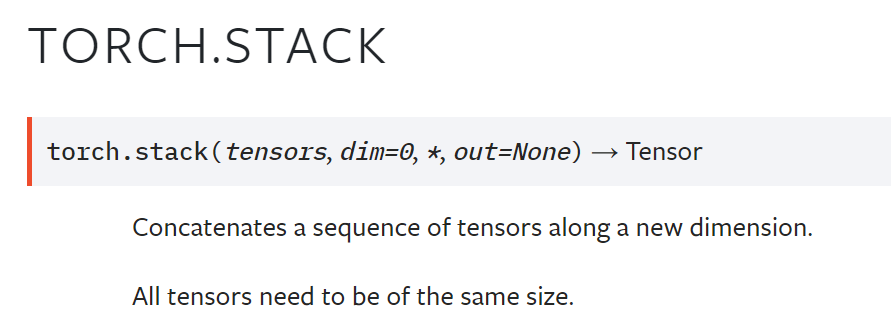

In [61]:
print("original shape of a : ", a.shape)
print( a_l_tensors )
print( " ---------- " ) 
e = torch.stack(a_l_tensors)
print(e)
print(e.shape) # <-- You will see another dimension at second 

original shape of a :  torch.Size([3, 2, 4])
(tensor([[[1, 2, 3, 4],
         [5, 6, 7, 8]]]), tensor([[[11, 12, 13, 14],
         [15, 16, 17, 18]]]), tensor([[[21, 22, 23, 24],
         [25, 26, 27, 28]]]))
 ---------- 
tensor([[[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8]]],


        [[[11, 12, 13, 14],
          [15, 16, 17, 18]]],


        [[[21, 22, 23, 24],
          [25, 26, 27, 28]]]])
torch.Size([3, 1, 2, 4])


## Dimension Operations

We sometimes need manipulation dimension directly. There are many operations. 
 - transpose
 - permutation 
 - squeeze
 - unsqueeze 

In [256]:
# transpose 

In [62]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                  ]
                  )
print(a)
print(a.shape)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]]])
torch.Size([3, 2, 4])


In [40]:
print(a.shape)
b = torch.transpose(a, 0, 1)
print(b.shape)
print(b)

torch.Size([3, 2, 4])
torch.Size([2, 3, 4])
tensor([[[ 1,  2,  3,  4],
         [51, 52, 53, 54],
         [21, 22, 23, 24]],

        [[ 5,  6,  7,  8],
         [55, 56, 57, 58],
         [25, 26, 27, 28]]])


In [63]:
print(a.shape)
c = torch.transpose(a, 0, 2)
print(c.shape)
print(c)

torch.Size([3, 2, 4])
torch.Size([4, 2, 3])
tensor([[[ 1, 11, 21],
         [ 5, 15, 25]],

        [[ 2, 12, 22],
         [ 6, 16, 26]],

        [[ 3, 13, 23],
         [ 7, 17, 27]],

        [[ 4, 14, 24],
         [ 8, 18, 28]]])


You can also swap all the dimensions at once by **permutation()**.

In [64]:
print("Original shape of a ", a.shape)
d = a.permute(2, 0, 1)
print(d.shape)
print(d)

Original shape of a  torch.Size([3, 2, 4])
torch.Size([4, 3, 2])
tensor([[[ 1,  5],
         [11, 15],
         [21, 25]],

        [[ 2,  6],
         [12, 16],
         [22, 26]],

        [[ 3,  7],
         [13, 17],
         [23, 27]],

        [[ 4,  8],
         [14, 18],
         [24, 28]]])


There are some differences between view, reshape, transpose, permuation in pytorch. 
Following descriptions are from the https://jdhao.github.io/2019/07/10/pytorch_view_reshape_transpose_permute/ .


- Both view() and reshape() can be used to change the size or shape of tensors. But they are slightly different.
- torch.reshape may return a copy or a view of the original tensor
- transpose(), like view() can also be used to change the shape of a tensor and it also returns a new tensor sharing the data with the original tensor
- One difference is that view() can only operate on contiguous tensor and the returned tensor is still contiguous
- "Contiguous " : the neighboring elements in the tensor are actually next to each other in memory.
- permute() and tranpose() are similar. transpose() can only swap two dimension. But permute() can swap all the dimensions. 

Dimension adding and deleting are supported by squeeze and unsqueeze easily. 


#### Squeeze

In [65]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x.shape)

torch.Size([2, 1, 2, 1, 2])


In [66]:
y = torch.squeeze(x)
print(y.shape) # <-- you will see 1 (empty-dimension) is removed 

torch.Size([2, 2, 2])


In [263]:
# or you can specify the squeezing dimension
y = torch.squeeze(x, 1)
print(y.shape) # <-- you will see dim=1 is removed 

torch.Size([2, 2, 1, 2])


#### Unsqueeze

In [67]:
print(y.shape)
z = y.unsqueeze(dim=1)
print(z.shape)

torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 2])


## Tensor Indexing

There are many intutive examples to illustrate the indexing concept. 
I borrowed figures and examples from 
 - https://medium.com/analytics-vidhya/understanding-indexing-with-pytorch-gather-33717a84ebc4
 

In [69]:
x = [ [ 0,1,2,3,4,5,6,7,8,9 ], 
      [ 10,11,12,13,14,15,16,17,18,19 ], 
      [ 20,21,22,23,24,25,26,27,28,29 ], 
      [ 30,31,32,33,34,35,36,37,38,39 ], 
    ]
x = torch.tensor(x)
x       
print(x.shape)

torch.Size([4, 10])


#### indexing with "   :  "

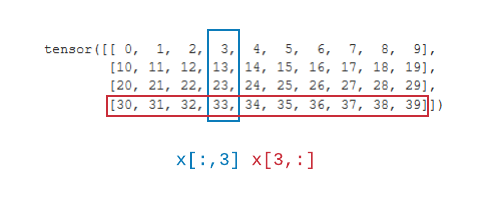

In [266]:
x[:, 3]

tensor([ 3, 13, 23, 33])

In [267]:
x[3,:]

tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [268]:
x[:, 2:5]

tensor([[ 2,  3,  4],
        [12, 13, 14],
        [22, 23, 24],
        [32, 33, 34]])

#### indexing with " -1 "

In [269]:
x[:, -1]

tensor([ 9, 19, 29, 39])

In [270]:
x[-1, :]

tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

Sometimes, you can just index the element - what you want

In [70]:
x = [ [ 0,  1, 2, 3, 4, 5, 6, 7, 8, 9 ], 
      [ 10,11,12,13,14,15,16,17,18,19 ], 
      [ 20,21,22,23,24,25,26,27,28,29 ], 
      [ 30,31,32,33,34,35,36,37,38,39 ], 
    ]
x = torch.tensor(x)
print(x.shape)
indices = torch.LongTensor([3,7,1,4])
print(x)
print("---")
x[:,indices]

torch.Size([4, 10])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])
---


tensor([[ 3,  7,  1,  4],
        [13, 17, 11, 14],
        [23, 27, 21, 24],
        [33, 37, 31, 34]])

## Reduce Operations

There are many reducing operations to select item or reduce tensor values 
 - min, max, mean
 - argmax, argmin 

In [71]:
a = torch.tensor( [
                        [
                            [ 1, 2, 3, 4 ], 
                            [ 5, 6, 7, 8 ], 
                        ],
                        [
                            [ 21, 22, 23, 24 ], 
                            [ 25, 26, 27, 28 ], 
                        ],
                        [
                            [ 11, 12, 13, 14 ], 
                            [ 15, 16, 17, 18 ], 
                        ],
                        
                  ]
                  )
print(a)
print(a.shape)

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[21, 22, 23, 24],
         [25, 26, 27, 28]],

        [[11, 12, 13, 14],
         [15, 16, 17, 18]]])
torch.Size([3, 2, 4])


In [72]:
torch.max(a)   # <-- find best value over all elements in a tensor

tensor(28)

In [75]:
m = torch.max(a, dim=2)
print(m) # <-- note that .max() return tuple ( values, indices ) 
print("shape : ", m.values.shape)

torch.return_types.max(
values=tensor([[ 4,  8],
        [24, 28],
        [14, 18]]),
indices=tensor([[3, 3],
        [3, 3],
        [3, 3]]))
shape :  torch.Size([3, 2])


#### argmax and argmin get indices of max or min directly 

In [76]:
torch.argmax(a, dim=2)

tensor([[3, 3],
        [3, 3],
        [3, 3]])